In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [36]:
x_dim = 3
y_dim = 3
n_samples = 1000

x = np.zeros((n_samples,x_dim))
y = np.zeros((n_samples,y_dim))

for n in range(n_samples):
    x[n,:] = np.random.rand(x_dim).round(4)
    x[n,:] = 4*np.pi*(x[n,:]-0.5).round(4)
    y[n,0] = x[n,0:2].sum().round(4)
    y[n,1] = x[n,:].sum().round(4)
    y[n,2] = np.sin(x[n,0]).round(4) + np.cos(x[n,1]).round(4)

data = np.hstack([x,y]).round(4)

names_col = []
for i in range(x_dim):
    names_col.append('x'+ str(i+1))
for j in range(y_dim):
    names_col.append('y' + str(j+1))
df = pd.DataFrame(data,columns=names_col)

display(data)
display(df)

array([[ -5.9301,  -3.9559,  -3.271 ,  -9.886 , -13.157 ,  -0.3406],
       [ -1.7027,  -2.2506,  -5.4877,  -3.9534,  -9.4411,  -1.62  ],
       [ -4.2587,  -2.8312,   0.9726,  -7.0899,  -6.1173,  -0.0533],
       ...,
       [  3.6782,   2.9845,   2.5937,   6.6627,   9.2564,  -1.4989],
       [  0.3091,   0.8407,   2.7131,   1.1498,   3.8629,   0.9711],
       [ -3.4733,  -2.9845,  -0.5542,  -6.4579,  -7.012 ,  -0.662 ]])

,x1,x2,x3,y1,y2,y3
0,-5.9301,-3.9559,-3.2710,-9.8860,-13.1570,-0.3406
1,-1.7027,-2.2506,-5.4877,-3.9534,-9.4411,-1.6200
2,-4.2587,-2.8312,0.9726,-7.0899,-6.1173,-0.0533
3,-0.7816,-0.5077,-4.6584,-1.2893,-5.9477,0.1695
4,-0.2149,6.0356,-1.1084,5.8207,4.7124,0.7563
...,...,...,...,...,...,...
995,3.7925,0.1835,-2.7847,3.9760,1.1913,0.3773
996,0.4951,-2.2205,4.4887,-1.7254,2.7633,-0.1298
997,3.6782,2.9845,2.5937,6.6627,9.2564,-1.4989
998,0.3091,0.8407,2.7131,1.1498,3.8629,0.9711


<IPython.core.display.Javascript object>


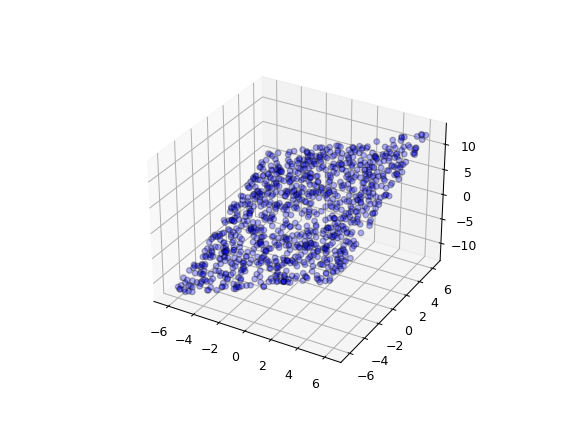

<IPython.core.display.Javascript object>


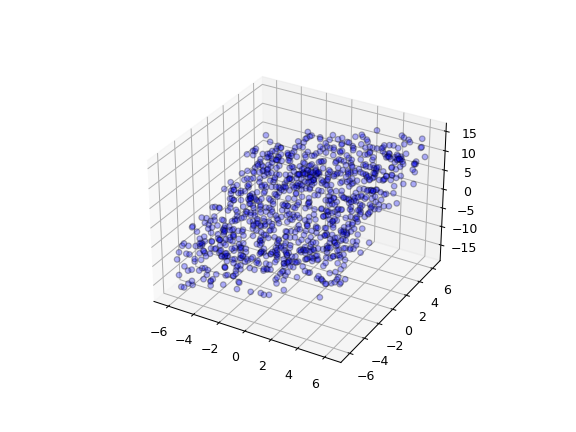

<IPython.core.display.Javascript object>


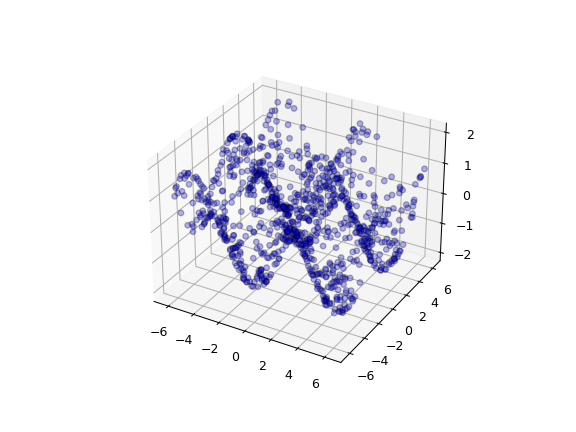

In [37]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

ax1.scatter(data[:,0],data[:,1],data[:,3],
          edgecolor='black',
          color ='blue',
          alpha =0.3)
plt.savefig("test.pdf")

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(data[:,0],data[:,1],data[:,4],
          edgecolor='black',
          color ='blue',
          alpha =0.3)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

ax3.scatter(data[:,0],data[:,1],data[:,5],
          edgecolor='black',
          color ='blue',
          alpha =0.3)

In [39]:
import plotly.graph_objs as go

x = data[:,0]
y = data[:,1]
z = data[:,3]

trace = go.Scatter3d(
    x = x, 
    y = y, 
    z = z,
    mode = 'markers', 
    marker = dict(
        size = 3,
      color = z, # set color to an array/list of desired values
        colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
fig.show()

fig.write_html("fig_01.html")

In [40]:
x = data[:,0]
y = data[:,1]
z = data[:,4]

trace = go.Scatter3d(
    x = x, 
    y = y, 
    z = z,
    mode = 'markers', 
    marker = dict(
        size = 3,
      color = z, # set color to an array/list of desired values
        colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
fig.show()

fig.write_html("fig_02.html")

In [49]:
x = data[:,0]
y = data[:,1]
z = data[:,5]

trace = go.Scatter3d(
    x = x, 
    y = y, 
    z = z,
    mode = 'markers', 
    marker = dict(
        size = 3,
      color = z, # set color to an array/list of desired values
        colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
fig.show()

fig.write_html("fig_03.html")

In [51]:
x2 = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y2 = x2.copy().T # transpose
z2 = np.cos(x2 ** 2 + y2 ** 2)

# x2 = data[:,0]
# y2 = data[:,1]
# z2 = data[:,4]

trace = go.Surface(x = x2, y = y2, z =z2 )
data_s = [trace]
layout = go.Layout(title = '3D Surface plot')
fig = go.Figure(data = data_s)
fig.show()

fig.write_html("fig_04.html")

In [52]:
display(x2,y2,z2)

array([[-2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ],
       [-1.86206897, -1.86206897, -1.86206897, -1.86206897, -1.86206897,
        -1.86206897, -1.86206897, -1.86206897, -1.86206897, -1.86206897,
        -1.86206897, -1.86206897, -1.86206897, -1.86206897, -1.86206897,
        -1.86206897, -1.86206897, -1.86206897, -1.86206897, -1.86206897,
        -1.86206897, -1.86206897, -1.86206897, -1.86206897, -1.86206897,
        -1.86206897, -1.86206897, -1.86206897, -1.86206897, -1.86206897],
       [-1.72413793, -1.72413793, -1.72413793, -1.72413793, -1.72413793,
        -1.72413793, -1.72413793, -1.72413793, -1

array([[-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
        -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
         0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
         0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
         1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ],
       [-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
        -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
         0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
         0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
         1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ],
       [-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0

array([[-0.14550003,  0.37711637,  0.77158563,  0.97300878,  0.98281051,
         0.84395529,  0.61482584,  0.35018219,  0.09128874, -0.13645656,
        -0.32132971, -0.46118753, -0.55925174, -0.62065892, -0.6500367 ,
        -0.6500367 , -0.62065892, -0.55925174, -0.46118753, -0.32132971,
        -0.13645656,  0.09128874,  0.35018219,  0.61482584,  0.84395529,
         0.98281051,  0.97300878,  0.77158563,  0.37711637, -0.14550003],
       [ 0.37711637,  0.79522584,  0.98773718,  0.95538608,  0.75287196,
         0.45459318,  0.12910458, -0.17404272, -0.42710005, -0.62065892,
        -0.75773327, -0.84791098, -0.90277665, -0.93286355, -0.94589175,
        -0.94589175, -0.93286355, -0.90277665, -0.84791098, -0.75773327,
        -0.62065892, -0.42710005, -0.17404272,  0.12910458,  0.45459318,
         0.75287196,  0.95538608,  0.98773718,  0.79522584,  0.37711637],
       [ 0.77158563,  0.98773718,  0.94345884,  0.70065489,  0.35018219,
        -0.02273185, -0.35712049, -0.62065892, -0